# Machine learning intro
Means a lot of things spanning various use cases and different types of algorithms:

![](images/machine_learning_types_tree.png)

- **Supervised vs unsupervised learning**
  - **Supervised learning** is the common one: We have a known input and a known output and we train our model with data learning from the known output (the results). When the model is trained the purpose is to feed new data to the model and let it predict the output. (After training data comes test data to see if the model behaves)
    - Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.
    - Regression: A regression problem is when the output variable is a real value, such as “dollars” or “weight”.
  - **Unsupervised learning** is where you only have input data (X) and no corresponding output variables. So it is about finding similarities in the input data and make categories. 2 main types: 
    - **Clustering:** A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
    - **Association:**  An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.
  - **Semi-Supervised Machine Learning** where you have a large amount of input data (X) and only some of the data is labeled (Y) are called semi-supervised learning problems. A good example is a photo archive where only some of the images are labeled, (e.g. dog, cat, person) and the majority are unlabeled. Many real world machine learning problems fall into this area. This is because it can be expensive or time-consuming to label data as it may require access to domain experts. Whereas unlabeled data is cheap and easy to collect and store. Unsupervised learning techniques can be used to discover and learn the structure in the input variables.  
[Source](https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/)


## Machine learning lingo
**Feature**: variable, column, attribute, field  
**Instance**: row, observation, data point, value, case  
**Target**: predictant, dependent variable, label  
**Data**: predictor, set of predictor variables, input variables fed to the ml algorithm  

**Model**: A machine learning model is an algorithm and a set of weights that can be trained on Data and Target  
**Training set**: The data we use to train our model be multiple feedings and feedback mechanism  
**Test set**: The data we use after training the model, to see if the model performs well on other data (not used for training)  


## Machine learning concepts

* Features
* n-dimensional feature space
* Modelling
* Model correctness
* Overfitting/underfitting
* Training/testing data
* Sklearn

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Feature spaces
#### Feature = nummeric representation of raw data

The Feature space (multidimensional coordinate system) is where our variables exists. This is used in machine learning as we have certain variables related to a target value:  
E.g Testing car tires durability we might have target value = thickness of tires after test run and our variables as: X1 = duration of test run, X2 = distance travelled in test run, X3 = Amount of certain chemical in tires

After many test runs we have an amount of features (test runs each with 3 variables) that we can use to start predicting correlation between the variables and the target value (tire thickness)

|test run|duration|distance|amount of chemical x| **TARGET**: tire thickness |
|--|--|--|--|--|
|test 1| 4 min |20 km| 0.3g|2,3|
|test 2| 5 min |40 km| 0.3g|2,1|
|test 3| 3 min |20 km| 0.4g|2,2|
...



In [2]:
%pylab inline
import sklearn

Populating the interactive namespace from numpy and matplotlib


### scikit-learn
For this notebook you need to have the `scikit-learn` (http://scikit-learn.org/stable/index.html) module installed, which is part of a normal Anaconda installation.

## Feature Spaces

#### One-dimensional Features Space 
Randomly generated data of shape (400,1)  
make_blobs() takes a number of samples, a list of centers and a [standard deviation](https://www.mathsisfun.com/data/standard-deviation.html) and returns a n-dimensional sample collection based on the inputted centers. If the centers are one dimensional, then the sample data will be one-dimensional


[[61.24025098]
 [54.74726777]]
[[61]
 [55]]
shape data (400, 1) [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


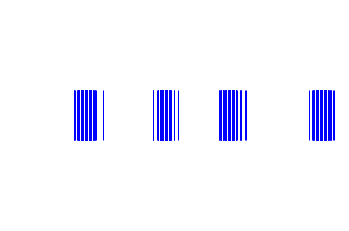

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


centers = [[60], [120], [170], [240]]
# create an array of 400 arrays containing one value each, that is set close to one of the 4 centers
data, _ = make_blobs(n_samples=400, cluster_std=4, centers=centers)
print(data[0:2])
data_1d = np.rint(data).astype(np.uint8) # round to nearest integer (400 values)
print(data_1d[0:2])
print('shape data',np.shape(data),np.zeros(np.shape(data))[0:5]) # x = clustered values, y = 0

plt.xlim(0, 255)
plt.ylim(-0.3, 0.3)

y = np.zeros(np.shape(data))
plt.plot(data_1d , y, 'b|', ms=50) # plot rounded x values and y = 0
plt.axis('off') # turn off axis lines and labels
plt.show()

## Two-dimensional Features Space 
Randomly generated data of shape (2500,2)

[[ 1.04660903 -0.99167019]
 [ 2.00835894  0.99177879]
 [ 0.97902357 -1.11084531]
 ...
 [-0.07611085 -0.10277895]
 [ 0.12085698 -0.2095974 ]
 [ 1.92432512  1.07479941]]
(2500, 2)


Text(0.5, 1.0, 'Clusters based around the center values:')

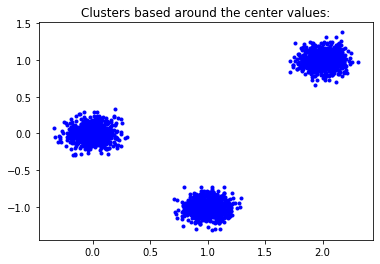

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[2, 1], [0, 0], [1, -1]] # centers are now 2-d
data_2d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.1)
print(data_2d)
print(np.shape(data_2d))
plt.plot(data_2d[:,0], data_2d[:,1], 'b.')

plt.title('Clusters based around the center values:')
#plt.show()

## Three-dimensional Features Space 

<IPython.core.display.Javascript object>


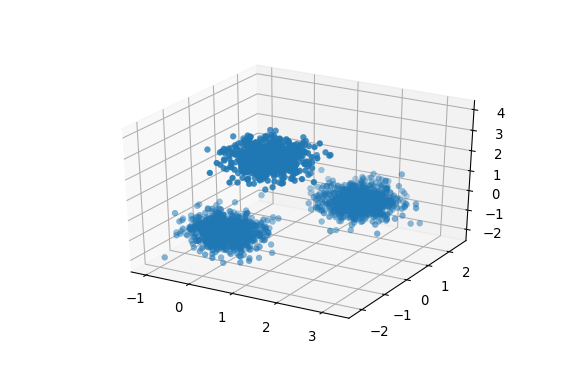

In [7]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs


centers = [[2, 1, 0], [0, -1, -1], [1, -1, 3]]
data_3d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)
x, y, z = data_3d[:,0], data_3d[:,1], data_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidth=0.2)

plt.show()

## Feature vectors as descriptions of things

Let's say we have a Person class:

```python

class Person:
    
    def __init__(self, age, height):
        self.age = age
        self.height = height
```

A Person is described by two **features**: `age` and `height`

* So a **feature vector** for a person would have 2 dimensions
  * $x^1 = $ age
  * $x^2 = $ height

## Feature vectors in high dimensions

* Imagine a grayscale image with the resolution `1024 x 800`
  * How many pixels does that image have?
  * each pixel has a value representing the greyscale color of the pixel

* That image has `1024 * 800 = 819200` features!  
If x is our feature space:
```python
x[0]      # First feature
x[819199] # Last feature
```

## Motivating the problem

“We need to be able to predict whether a particular
customer will stay with us. Here are the logs of customers’ interactions with our product for
five years.”

What information can we get from a log?

* Timestamp
* Number of connections
* Frequency of connections
* Session duration
* ...?

The more precisely we can describe the data, the better our model gets!

We want to select the information that is important and *remove* the ones that aren't.

## Feature engineering

The problem of transforming raw data into a dataset is called feature engineering.

Goal: describe data with *informative* features

### Overview of data encoding techniques
* One-hot
* Binning
* Word embeddings
* Normalisation
* Standardisation
* Dealing with missing features

### Techniques to encode data in specific ways

* One-hot
  - the idea that a column with e.g countries is changed into many columns (each country has its own column) and then 0 or 1 indicate if that country is present in the data row
* Binning
  - grouping values into bins/categories eg: 1-10, 11-20, 21-30
  - replacing values with categories
* Word embeddings
  - words that have similar context will have similar meanings.
  - Embedding Layer: approach of learning an embedding layer requires a lot of training data and can be slow
  - Word2Vec: was developed by Tomas Mikolov, et al. at Google in 2013
  - GloVe: GloVe, a new global log-bilinear regression model for the unsupervised learning of word representations that outperforms other models on word analogy, word similarity
* Normalisation
  - data for machine learning must be 1. binary (2 possible values), 2. nummeric, or 3. categorical
  - nummeric data must be normalized by eg converting to standard diviation from mean (whereby values will range between -6.0 and +6.0 and thus be comparable to other data of different scale.
* Standardisation
  - a standardization object is created to hold all features (dependend and independent) in a standardized and normalized form with values like 1, -1, (0,0,1.0,0) and -1.34
* Dealing with missing features
  1. Removing the feature from dataset if it’s highly correlated with another data.
  2. Guessing it’s value on different factors if it’s moderately correlated with another data.
  3. Removing the training examples that have any feature missing/
  4. Setting the missing features to 0 (remember to scale accordingly every feature to <-1, 1>).
  5. Preprocessing the data to a different format that better handle missing values.
  6. Selecting a model that handle missing values better (eg. use a neural network instead of decision tree)

## One-hot encoding

Imagine $n$ features. One-hot encoding means setting **one** feature to 1 and the rest to 0.

Example:
 * Features `[Left, Right]`: `[1, 0]`
 * Features `[M, T, W, T, F, S, S]`: `[0, 0, 1, 0, 0, 0]`
 * Features `[M, F, X]`: `[0, 1, 0]`

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs = [['Male'], ['Female'], ['Female']]
encoder.fit_transform(xs).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.]])

In [9]:
encoder.fit_transform(xs).todense()

matrix([[0., 1.],
        [1., 0.],
        [1., 0.]])

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs = [['Male', 1], ['Female', 3], ['Female', 2], ['Male', 3]]
print('col1 is female, col2 is male, col3 is 1, col4 is 2, col5 is 3')
encoder.fit_transform(xs).todense()

col1 is female, col2 is male, col3 is 1, col4 is 2, col5 is 3


matrix([[0., 1., 1., 0., 0.],
        [1., 0., 0., 0., 1.],
        [1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 1.]])

## Word embeddings
See [Explanation here](https://machinelearningmastery.com/what-are-word-embeddings/)

How do we represent words?

Can we make them into feature vectors?

Definition: Feature vector:
- A vector is a series of numbers. It is like a matrix with only one row but multiple columns (or only one column but multiple rows). An example is: [1,2,3,5,6,3,2,0].
- A feature vector is just a vector that contains information describing an object's important characteristics.

**Yes we can!** [See scikit-learn tutorial here](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

![](images/word-embeddings.png)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document? Is it?',
]
vectorizer = CountVectorizer()

fit = vectorizer.fit_transform(corpus)
print(type(fit))
res = fit.todense() # returns a numpy array of same shape"
document_idx = vectorizer.vocabulary_['document']
print(document_idx)
document_count = sum(res[:,document_idx]) # sum all row cells where column == index
print('document occurs {} times in the text'.format(document_count))
print('{} is the index for document'.format(document_idx))
mat = fit.toarray()
print('There are 9 different words in the 4 sentences\n',vectorizer.get_feature_names())
print('In second sentence document occurs twice, which tells us that "document" is in second collumn')
print(res)
print('------------------------')
print(mat)
print('------------------------')

<class 'scipy.sparse.csr.csr_matrix'>
1
document occurs 4 times in the text
1 is the index for document
There are 9 different words in the 4 sentences
 ['and', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third', 'this']
In second sentence document occurs twice, which tells us that "document" is in second collumn
[[0 1 1 1 0 0 0 1 0 1]
 [0 2 0 1 0 0 1 1 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [0 1 1 2 1 0 0 1 0 1]]
------------------------
[[0 1 1 1 0 0 0 1 0 1]
 [0 2 0 1 0 0 1 1 0 1]
 [1 0 0 1 0 1 0 1 1 1]
 [0 1 1 2 1 0 0 1 0 1]]
------------------------


In [13]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third', 'this']


## Exercise

* Use the `CountVectorizer` from `sklearn.feature_extraction` to read the book `data/moby_dick.txt`
  * How many times does the word 'wood' appear?
* Use the `load_digits` function from the `sklearn.datasets` package to load a `sklearn` dataset
  * The package contains `.data` of 8x8 images. Extract the first image in an 8x8 array
  * Use the `plt.imshow` function to plot the image

## Modelling
#### What is a model?

* A **simplified** representation

## 3 Popular model types 

* Regression
  * What is the value of 'Y' at 'X?'
* Classification
  * Is it an 'X'?
* Clustering
  * Is this closest to 'X' or 'Y'?

## Recap

* Model types
    * Regression
    * Classification
    * Clustering
* Models are
    1. Constructed
    2. Trained
    3. Tested